In [7]:
from PIL import Image

In [31]:
import torch.nn as nn
from torch.nn import functional
from torchvision import transforms as T

class CropSize(nn.Module):
    def __init__(self, size):
        super(CropSize, self).__init__()
        self.size = size
    
    def forward(self, image):
        '''
            image: tensor image
        '''
        h, w = image.shape[-2:]
        delta_x = self.size - w
        delta_y = self.size - h
        left = int(delta_x / 2)
        right = delta_x - left
        top = int(delta_y / 2)
        bottom = delta_y - top
        print(image.shape)
        out = functional.pad(image, [left, right, top, bottom], mode='replicate')
        print(out.shape)
        return out


    def __repr__(self) -> str:
        return f'Padding with width x height: {self.size} x {self.size}'

to_tensor = T.Compose([
    T.ToTensor(),
    CropSize(64),
    T.Normalize(mean=[0.9, 0.9, 0.9], std=[0.1, 0.1, 0.1]),
])

augmenter = T.Compose([
    T.ColorJitter(0.2, 0.1, 0.5, 0.2),
    T.RandomGrayscale(0.2),
    to_tensor
])

In [32]:
aimg = to_tensor(img)

torch.Size([3, 40, 64])
torch.Size([3, 64, 64])


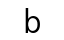

In [30]:
img = Image.open('../../../dataset/font_images_all/trispace/light/b_trispace_light.png').convert('RGB')
img